# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-07-24 01:48:49.752218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fabrica/anaconda3/envs/sigmov/lib/python3.8/site-packages/cv2/../../lib64:
2024-07-24 01:48:49.752237: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [62]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1721798788.495818    7395 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1721798788.576426   12270 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.01), renderer: NVIDIA T1000 8GB/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [63]:
draw_landmarks(frame, results)

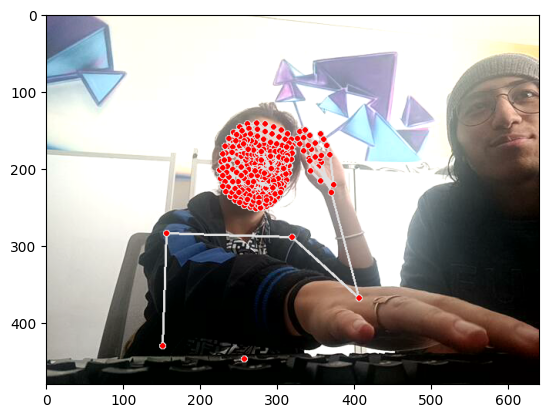

In [64]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [65]:
len(results.left_hand_landmarks.landmark) 

21

In [66]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [67]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [68]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [70]:
result_test = extract_keypoints(results)

In [71]:
result_test

array([ 0.45694727,  0.41727734, -0.08607031, ...,  0.        ,
        0.        ,  0.        ])

In [72]:
np.save('0', result_test)

In [73]:
np.load('0.npy')

array([ 0.45694727,  0.41727734, -0.08607031, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('fruit-model')

# Actions that we try to detect
actions = np.array(['Aguacate', 'manzana', 'piña','mora','fresa','naranja','coco','durazno','banano','papaya'])
########### Este listas de ALS, cambiar LSC #########

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 30

In [75]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Guardar - primero video como clave puntos        

# 5. Collect Keypoint Values for Training and Testing

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):#start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                                                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break   
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1721367350.073240   15806 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1721367350.121257   16018 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.01), renderer: NVIDIA T1000 8GB/PCIe/SSE2


In [15]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'Aguacate': 0,
 'manzana': 1,
 'piña': 2,
 'mora': 3,
 'fresa': 4,
 'naranja': 5,
 'coco': 6,
 'durazno': 7,
 'banano': 8,
 'papaya': 9}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res) 
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(500, 30, 1662)

In [15]:
np.array(labels).shape

(500,)

In [16]:
X = np.array(sequences)

In [17]:
X.shape

(500, 30, 1662)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [20]:
y_test.shape

(25, 10)

# 7. Build and Train LSTM Neural Network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [22]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [1]:
# Modelo 1
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'Sequential' is not defined

In [23]:
# Modelo 2
# Crear el modelo secuencial
model = Sequential()

# Añadir una capa convolucional
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(30, 1662)))

# Añadir una capa de pooling
model.add(MaxPooling1D(pool_size=2))

# Añadir una segunda capa convolucional
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Añadir una segunda capa de pooling
model.add(MaxPooling1D(pool_size=2))

# Añadir una tercera capa convolucional
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Utilizar GlobalMaxPooling1D en lugar de MaxPooling1D para evitar problemas de tamaño
model.add(GlobalMaxPooling1D())

# Aplanar la salida antes de las capas densas
model.add(Flatten())

# Añadir una capa densa
model.add(Dense(64, activation='relu'))

# Añadir una segunda capa densa
model.add(Dense(64, activation='relu'))

# Añadir una tercera capa densa
model.add(Dense(32, activation='relu'))

# Añadir una cuarta capa densa
model.add(Dense(32, activation='relu'))

# Añadir la capa de salida
model.add(Dense(actions.shape[0], activation='softmax'))

2024-07-24 01:49:57.762415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-24 01:49:57.762693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fabrica/anaconda3/envs/sigmov/lib/python3.8/site-packages/cv2/../../lib64:
2024-07-24 01:49:57.762763: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fabrica/anaconda3/envs/sigmov/lib/python3.8/site-packages/cv2/../../lib64:
2024-07-24 01:49:57.762821: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

In [36]:
# Modelo 1
# Compilar el modelo
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Modelo 2
# Compilar el modelo
history = model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train, epochs= 500, callbacks=[tb_callback])

Epoch 1/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2698 - accuracy: 0.9347
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1145 - accuracy: 0.9621
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1779 - accuracy: 0.9432
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9705
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9979
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 11/

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            319168    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0

In [34]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)

acc = history.history['accuracy']

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, acc, 'g', label='Training Accuracy')  
# Verificar si 'val_loss' está en el historial
if 'val_loss' in history.history:
    val_loss = history.history['val_loss']
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')

# Verificar si 'val_accuracy' está en el historial
if 'val_accuracy' in history.history:
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')  # Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()




AttributeError: 'NoneType' object has no attribute 'history'

# 8. Make Predictions

In [26]:
res = model.predict(X_test)

In [27]:
actions[np.argmax(res[1])]

'piña'

In [28]:
actions[np.argmax(y_test[1])]

'fresa'

# 9. Save Weights

In [107]:
model.save('frutas.h5')

In [92]:
#del model

In [47]:
model.load_weights('frutas.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [48]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [49]:
yhat = model.predict(X_test)

In [50]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [51]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[23,  0],
        [ 0,  2]],

       [[21,  0],
        [ 0,  4]],

       [[24,  0],
        [ 0,  1]],

       [[23,  0],
        [ 0,  2]],

       [[23,  0],
        [ 0,  2]],

       [[22,  1],
        [ 0,  2]],

       [[20,  0],
        [ 1,  4]],

       [[20,  0],
        [ 0,  5]],

       [[23,  0],
        [ 0,  2]]])

In [52]:
accuracy_score(ytrue, yhat)

0.96

# 11. Test in Real Time

In [53]:
from scipy import stats

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245)]
def prob_viz (res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

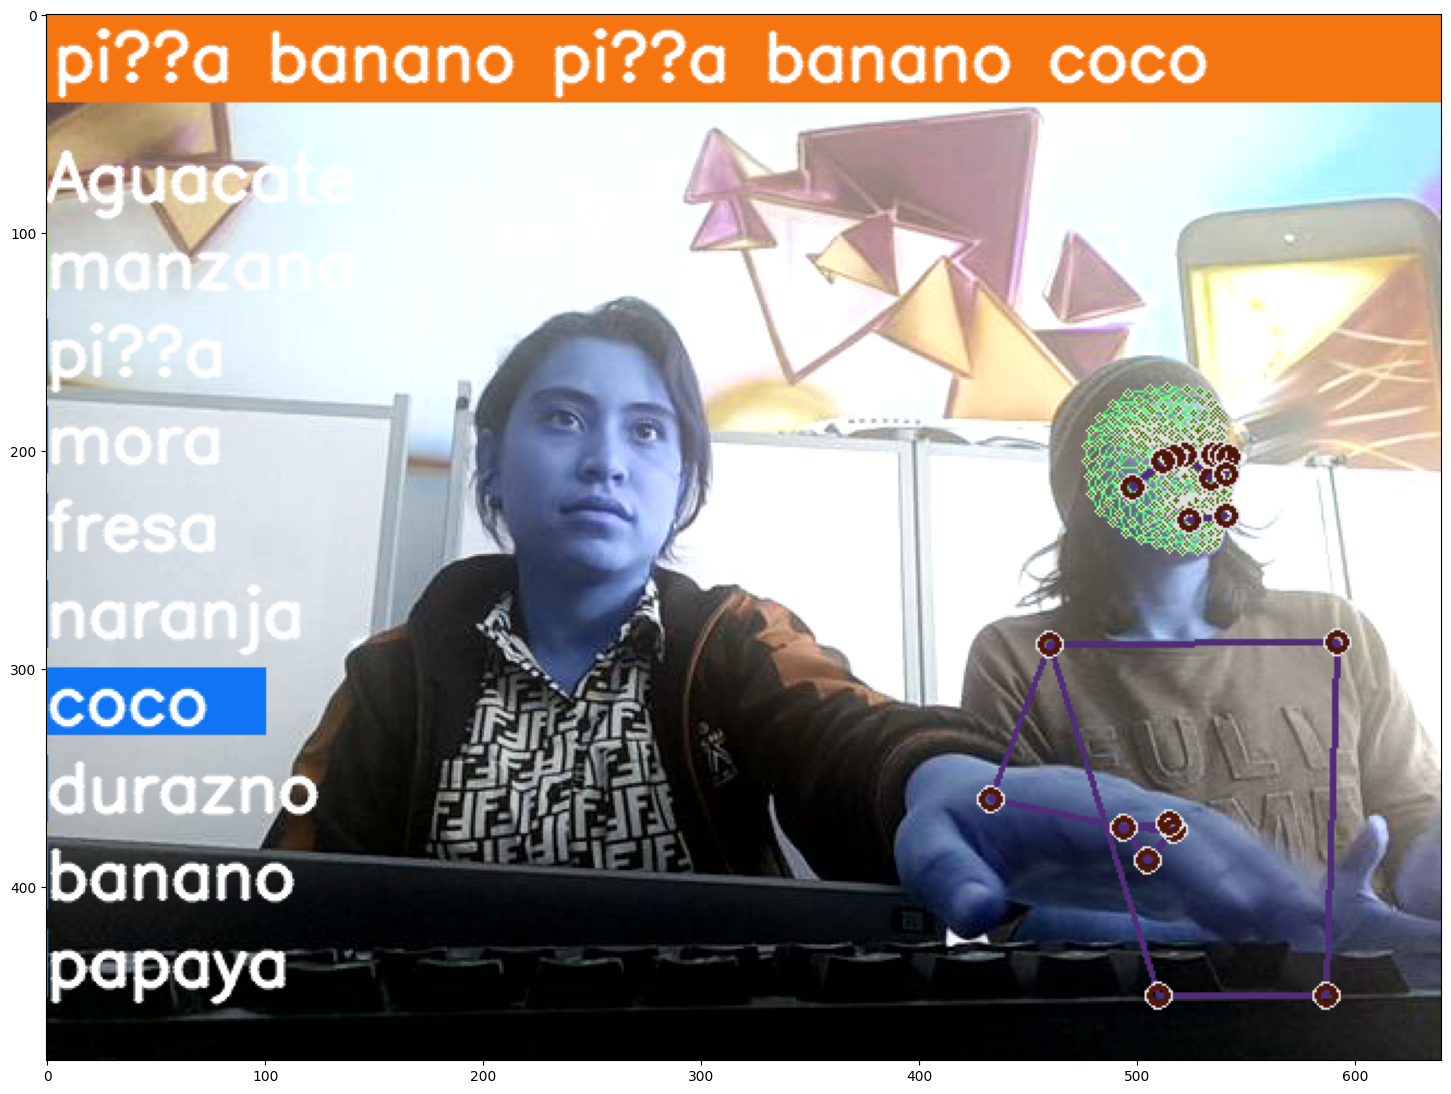

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image,colors))

In [1]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined